# CSC 380 Homework 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Question 1

In [2]:
data = pd.read_csv("olympics.csv")
data

,ISO country code,Country name,2011 GDP,2010 population,Female count,Male count,Gold medals,Silver medals,Bronze medals
0,USA,US,1.509400e+13,309349000,271,260,46,29,29
1,CHN,China,7.298100e+12,1338300000,208,163,38,27,23
2,JPN,Japan,5.867150e+12,127451000,162,141,7,14,17
3,DEU,Germany,3.570560e+12,81777000,176,219,11,19,14
4,FRA,France,2.773030e+12,64895000,148,187,11,11,12
5,BRA,Brazil,2.476650e+12,194946000,128,138,3,5,9
6,GBR,UK,2.431590e+12,62232000,269,287,29,17,19
7,ITA,Italy,2.194750e+12,60483000,122,159,8,9,11
8,RUS,Russia,1.857770e+12,141750000,227,208,24,26,32
9,IND,India,1.847980e+12,1224615000,23,60,0,2,4


In [3]:
medal_data = data[["Country name", "Gold medals", "Silver medals", "Bronze medals"]]
medal_data

,Country name,Gold medals,Silver medals,Bronze medals
0,US,46,29,29
1,China,38,27,23
2,Japan,7,14,17
3,Germany,11,19,14
4,France,11,11,12
5,Brazil,3,5,9
6,UK,29,17,19
7,Italy,8,9,11
8,Russia,24,26,32
9,India,0,2,4


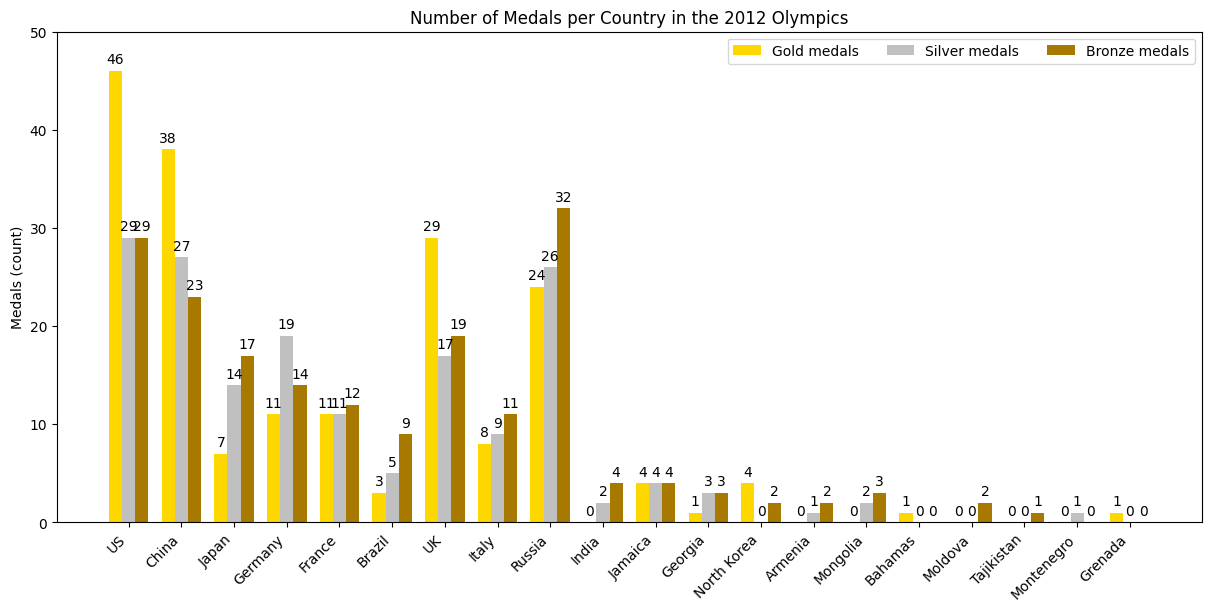

In [4]:
x = np.arange(len(data["Country name"]))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6.0), layout="constrained")

medal_labels = ["Gold medals", "Silver medals", "Bronze medals"]
colors = ["gold", "silver", "xkcd:bronze"]
for color, medal in zip(colors, medal_labels):
    offset = width * multiplier
    rects = ax.bar(x+offset, medal_data[medal], width, label=medal, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel("Medals (count)")
ax.set_title("Number of Medals per Country in the 2012 Olympics")
ax.set_xticks(x + width, data["Country name"], rotation=45, ha="right")
ax.legend(loc="upper right", ncols=3)
ax.set_ylim(0, 50)

plt.show()

This visualization it is easier to tell the relative distribution of the gold, silver, and bronze medals per country. 

However it is more difficult to determine which country has more medals than another country very quickly.

## Question 2

Given two fair six-sided dice there are 36 possible outcomes for the two rolls. 

For the two rolls there are only 5 possible outcomes where the sum of the two rolls adds to 8: 2&6, 3&5, 4&4, 5&3, and 6&2.

Thus the probability that the two dice's outcome sums to 8 is:

$$
P(E) = \frac{5}{36}=0.13\overline{8}\approx13.9\%
$$

## Question 3

In [5]:
np.random.seed(2025)

In [6]:
n = 1000
res_dice1 = np.random.randint(1, 6+1, size=n)
res_dice2 = np.random.randint(1, 6+1, size=n)
# res = [(res_dice1[i], res_dice2[i]) for i in range(len(res_dice1))]
res = res_dice1 + res_dice2
index = np.where(res==8)[0]
prob = np.size(res[index])/n
prob

0.15

In this simulation the empirical frequency of E is 15%. Of the 1000 "rolls" of the dice 15% of the time the sum of the die was 8.

## Question 4

In [7]:
np.random.seed(2025)

In [8]:
def prob_E(n):
    res_dice1 = np.random.randint(1, 6+1, size=n)
    res_dice2 = np.random.randint(1, 6+1, size=n)
    
    res = res_dice1 + res_dice2
    index = np.where(res==8)[0]
    prob = np.size(res[index])/n
    return prob

In [9]:
n_rolls = 1000
for i in range(10):
    prob = prob_E(n_rolls)
    print(prob)

0.15
0.147
0.143
0.135
0.152
0.125
0.152
0.15
0.147
0.144


The numbers differ because each trial is a random process. It is not guaranteed that the final outcome will be $13.9\%$ just that on average, and with a larger number of trials/"rolls" the probability will approach that fixed value. But for any individual trial it is not guaranteed to be exactly $13.9\%$.

## Question 5

In [10]:
n_rolls = 10000
for i in range(10):
    prob = prob_E(n_rolls)
    print(prob)

0.1392
0.1376
0.1438
0.137
0.1413
0.1417
0.1376
0.1417
0.131
0.1356


The reported values of each trial are much closer to the true value of $13.9\%$. Thus the variation in final values per trial is lower. While both "experiments" final results centered around $13.9\%$ this verion, with 10000 rolls per trial, has a smaller standard deviation. This is because as the number of rolls increases the percentage will approach the theoretical value.

## Question 6

$$
A:\text{The sum of the two die is 6}
$$

$$
B: \text{The second die is even}
$$

The inclusion exclusion principle is:
$$
P(A \cup B) = P(A) + P(B) - P(A \cap B)
$$

The probability of event A is $\frac{5}{36}$ as there are five possible events of the 36 total after two dice rolls where the dice sum to 6.

The probability of event B is $\frac{1}{2}$ as there are three possible events of the 6 total after one dice roll where the die is even.

The probability of the dice summing to 6 and the second die being even is a bit trickier. There are five events where the dice sum to 6, namely:
(1, 5), (2, 4), (3, 3), (4, 2), (5, 1). Of those five events two of them meet the condition of event B (2, 4) and (4, 2). Thus the probability of event A and event B happenning simultaneously is $\frac{2}{36}=\frac{1}{18}$

Thus the final probability of $P(A \cup B)$ is:
$$
P(A\cup B) = \frac{5}{36} + \frac{18}{36} - \frac{2}{36} = \frac{21}{36} = \frac{7}{12} = 58.\overline{3}\%
$$

## Question 7

In [11]:
grades = np.array(200*["Freshman"] + 180*["Sophomore"] + 160*["Junior"] + 140*["Senior"] +\
                  800*["Freshman"] + 820*["Sophomore"] + 840*["Junior"] + 860*["Senior"])

majors = np.array(200*["CS Major"] + 180*["CS Major"] + 160*["CS Major"] + 140*["CS Major"] +\
                  800*["Non-CS Major"] + 820*["Non-CS Major"] + 840*["Non-CS Major"] + 860*["Non-CS Major"])

In [12]:
table = pd.crosstab(majors, grades, rownames=["Major"], colnames=["Grade"], margins=True, margins_name="Total")
order = ["Freshman", "Sophomore", "Junior", "Senior", "Total"]
table = table[order]
table

Grade,Freshman,Sophomore,Junior,Senior,Total
Major,,,,,
CS Major,200,180,160,140,680
Non-CS Major,800,820,840,860,3320
Total,1000,1000,1000,1000,4000


In [13]:
prob_table = table/4000
prob_table

Grade,Freshman,Sophomore,Junior,Senior,Total
Major,,,,,
CS Major,0.05,0.045,0.04,0.035,0.17
Non-CS Major,0.20,0.205,0.21,0.215,0.83
Total,0.25,0.250,0.25,0.250,1.00


These 7 new entries show the relative distributions of the majors and the grades, as well as the total probability of "selecting a student at random and they are a student." For example the grades had the same number of students so the probability of selecting a student at random and them being a particular grade is $1/4$ or $.25$ as shown in the probability table. The row marginals show the probability of selecting a student and they are a CS Major $0.17$ or they are a Non-CS Major, $0.83$. Lastly the probability of selecting a student and they are a student is $1.0$ which is indicated in the lower right cell in the probability table.

Given that a student is a senior the probability that they are a CS Major is:

$$
P(\text{CS}|\text{Senior})=\frac{0.035}{0.25}=0.14=14\%
$$

Given that the student is a senior actually decreases our belief that the student is a CS Major. This is because the probability of them being a CS Major given that they are a senior is $14\%$ while the total probability of any student being a CS Major is $17\%$.